In [3]:
# 解决numpy dtype warning problem
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style='ticks', color_codes=True)

## 绘制类别类型的数据图

使用`catplot()`函数。`catplot()`函数默认类型为`stripplot()`，即对于相同类别的数据将会坐落于同一个类别对应的竖轴附近(the categorical axis)。

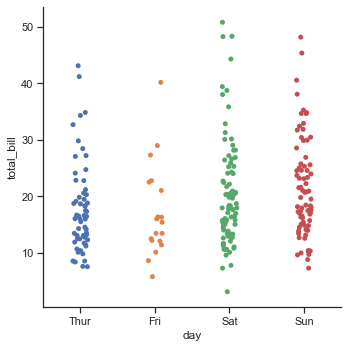

In [4]:
tips = sns.load_dataset('tips')
sns.catplot(x='day', y='total_bill', data=tips);

图中每个类别上的数据点分布有一定的抖动（jitter），可以设置`jitter`参数来控制抖动的大小幅度：

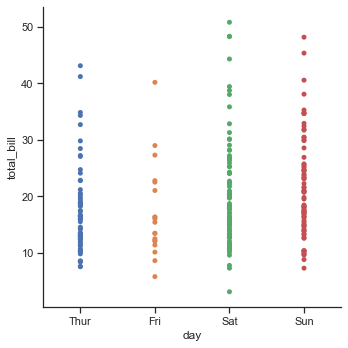

In [5]:
# 取消抖动
sns.catplot(x='day', y='total_bill', jitter=False, data=tips);

为了避免在添加抖动情况下，数据点重合（overlap）的现象发生，可以使用`swarmplot()`的方式，绘制"beeswarm"类型的图：

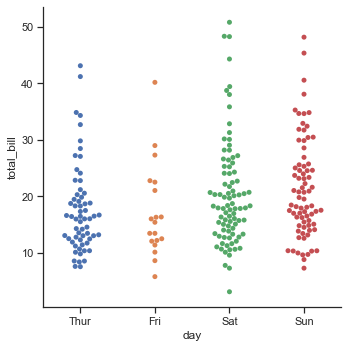

In [6]:
sns.catplot(x='day', y='total_bill', kind='swarm', data=tips);

与`relplot`类型，我们也可以对`catplot`添加一个新的维度`hue`.

> 不同的是，`catplot`不支持添加`size`或`style`语义信息。

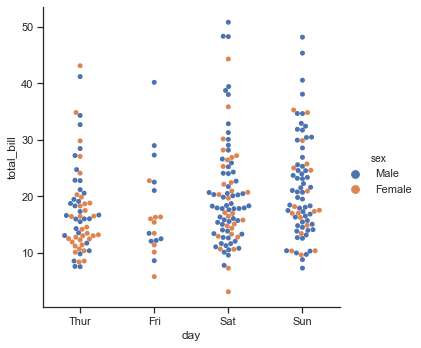

In [8]:
sns.catplot(x='day', y='total_bill', hue='sex', 
            kind='swarm', data=tips);

与数值数据不同，如何将分类变量的级别沿其轴排序的效果并不是很明显。例如数值类型的排序可以有数值由小到大排序，而类别数据，例如各种动物的数量，排序的效果不是很明显观察得到。

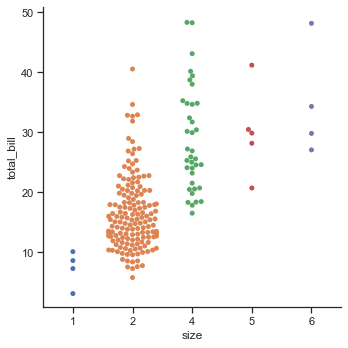

In [11]:
# 根据用餐人员的数目分类
sns.catplot(x='size', y='total_bill', kind='swarm',
            data=tips.query("size != 3"));  # 使用sql查询语句，获取size!=3的所有数据 

⚠  通常，seaborn类型数据绘图函数尝试从数据中推断类别的顺序。如果传递给分类轴的变量看起来是数值型的，那么层次将被排序。但是，**即使使用数字来标记它们，这些数据仍然被视为类别数据的**，并绘制在分类轴上相应的序号位置。

例如上面的例子中，我们使用`size`对用餐顾客进行分类，虽然`size`是数值类型的，但其代表着分类的含义。

---

当然，除了由seaborn自动推断类别数据顺序之外，我们可以显式的进行排序：

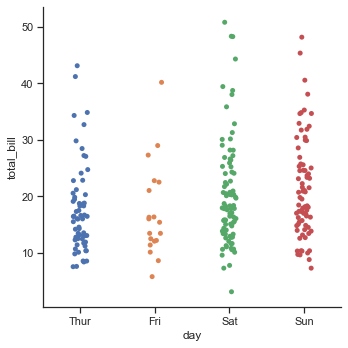

In [16]:
sns.catplot(x='day', y='total_bill', order=['Thur', 'Fri', 'Sat', 'Sun'], data=tips);

对于类别数据，将分类信息放在横轴上，而数值信息放在竖轴上可能不易于观察数值。因此，我们可以将类别信息与数值信息位置对调(swap)：

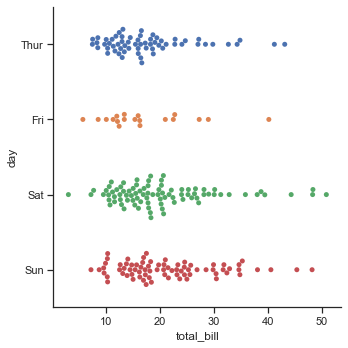

In [17]:
sns.catplot(x='total_bill', y='day', kind='swarm', data=tips);

---

## 箱型图

箱型图可以表示数据的分位数的分布情况，有利于观察数据的集中情况。

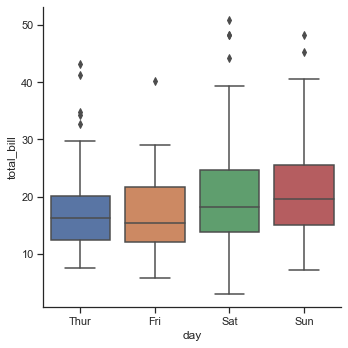

In [26]:
sns.catplot(x='day', y='total_bill', kind='box', data=tips);

同样的，我们可以额外增加`hue`语义，为图片提供更多的类别信息：

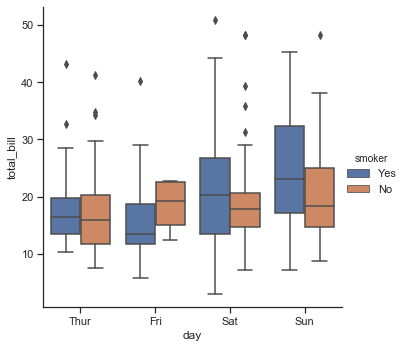

In [28]:
# 根据星期与顾客是否吸烟的信息绘制箱型图
sns.catplot(x='day', y='total_bill', hue='smoker', 
            kind='box', data=tips);

在上图中，我们将顾客是否吸烟的信息从原本只包含星期的图中抽离出来，使得不同类别的语义信息不会重叠。也可以这样理解，原本星期单独作为分类依据，此时每个星期中均同时包含顾客吸烟与不吸烟的两者信息，而现在通过添加`hue`语义，使得吸烟的信息单独分离出来，这样使得可视化的结果信息量更大。

这种操作被称为 "**dodging**"（偏移）。由于seaborn默认的是，`hue`语义信息是嵌套(nested)在主要的类别变量中的，例如`x=day`,则`smoker`信息默认是包含在`day`信息内的。

但是如果我们的`hue`信息不是与类别变量为嵌套关系，例如`weekend`（周末），是和`day`类别相同级别的信息，此时我们需要取消默认的偏移操作：



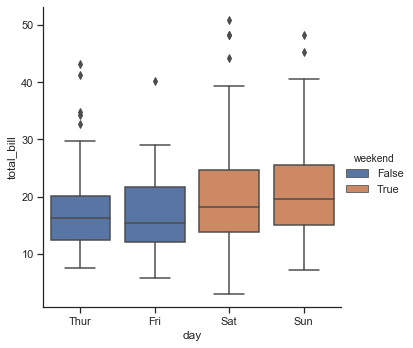

In [31]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])  # 布尔操作，判断星期是否处于周末
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

这里再展示如果我们不取消偏移的图示：

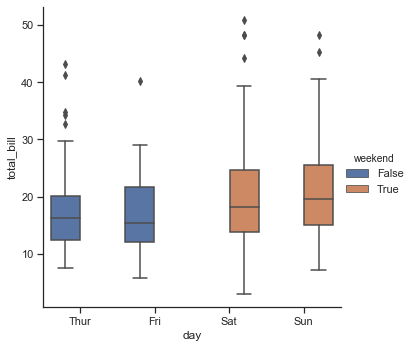

In [34]:
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", data=tips);

对比两图，可以发现在默认情况下，`weekend`信息是嵌套在`day`信息中的，这样就会导致箱型图的偏移。

---

eaborn同时提供了`boxenplot`函数，对比`boxplot`,其可以附带了更多关于数据分布的信息：

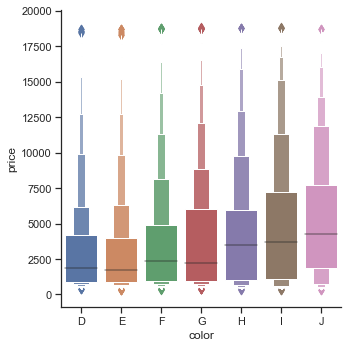

In [35]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

---

## 琴状图

为了表示数据的分布情况，我们还可以使用`violinplot()`函数,可以把其看作包含**[核密度估计](https://en.wikipedia.org/wiki/Kernel_density_estimation)**（kernel density estimation, KDE)的箱型图。

核密度估计的思想是：对于每个样本点$x_i$,我们对使用一个核函数$K(.)$估计，最后将所有样本点上的核函数累加平均。

![3h1ZYn.png](https://s2.ax1x.com/2020/03/03/3h1ZYn.png)

> Reference: [Intro to Kernel Density Estimation](https://www.youtube.com/watch?v=x5zLaWT5KPs).

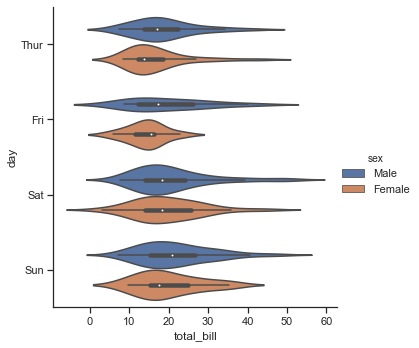

In [36]:
sns.catplot(x='total_bill', y='day', kind='violin',
            hue='sex', data=tips);

由于`violinplot()`使用KDE来提供数据分布信息，相对于原始`boxplot()`,其添加了部分参数的设置：

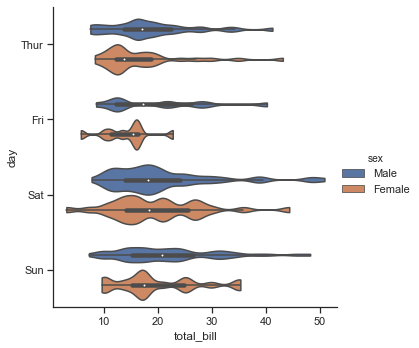

In [37]:
sns.catplot(x='total_bill', y='day', hue='sex',
            kind='violin', bw=.15, cut=0,
            data=tips);


</br>

核密度估计的参数`bw`代表者核函数的带宽(bandwidth),其直观含义可以理解为核函数在样本点附近的"宽度"设置。

![3h38u8.png](https://s2.ax1x.com/2020/03/03/3h38u8.png)

---

当`hue`语义信息只包含两个类别时，可以无需绘制两个`violin`,直接在一个`vilolin`上切分(split)为两边：

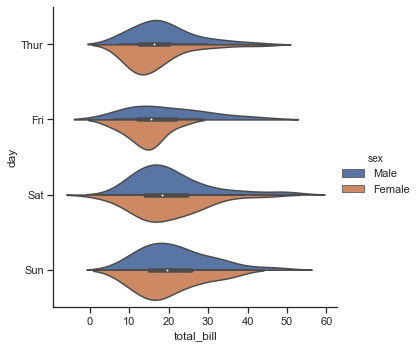

In [38]:
sns.catplot(x='total_bill', y='day', hue='sex',
            kind='violin', split=True, data=tips);

为了更具体地表示每个单独地观察值，而不是仅用箱型图概况所有数据值，可以进行如下修改：

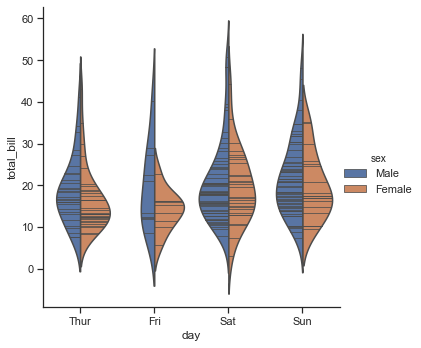

In [39]:
sns.catplot(x='day', y='total_bill', hue='sex',
            kind='violin', inner='stick', split=True,
            data=tips);

由图可以看到，在原本核密度估计区域内部的箱型图变为显示所有单独观察值。

同时，我们可以结合前文中的"beaswarm"图，形象地观察数据的分布：

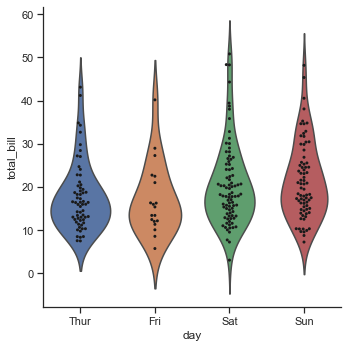

In [42]:
g = sns.catplot(x="day", y="total_bill", kind="violin", 
                inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", 
              size=3, data=tips, ax=g.ax);

代码证，`size`用于改变`swarmplot`中数据点的大小，而`ax`参数设置为与`violinplot`中相同的坐标轴。

> 需要注意的是，`swarmplot()`需要在先确定`x,y,data`等信息的情况下再调用，而不能先声明`swarmplot()`，再进行赋值。

---

## 柱状图



<cite>A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.</cite>

seaborn柱状图的设计可以对数据的集中趋势(central tendency)进行估计，并显示统计信息（默认是数据的均值）不确定性的估计误差。


In [45]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


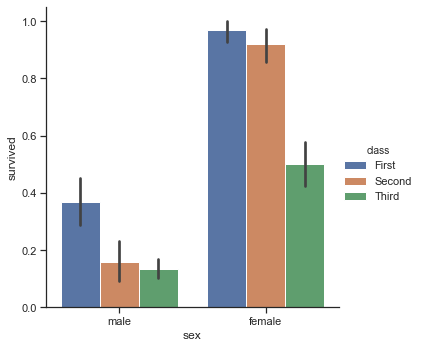

In [46]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

在图中,`barplot`对泰坦尼克号上不同性别的、不同船舱级别的乘客存活率进行估计，并且采用误差条(error bar)来反应参数估计的**置信区间**(confidence interval)。

---

有时，我们不关心数据的统计特征，想要使用柱状图，简单地观察每个类别上对应的样本数量，可以使用`countplot()`函数来完成：


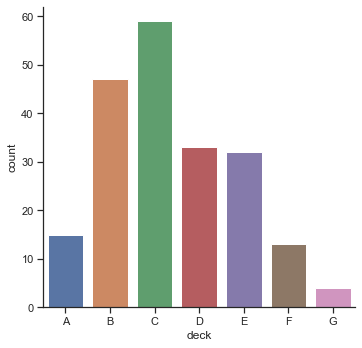

In [44]:
sns.catplot(x='deck', kind='count', data=titanic);

为了更美观柱状图的样式，我们可以对每个bar的颜色进行渐变处理，添加每个柱的边缘颜色：

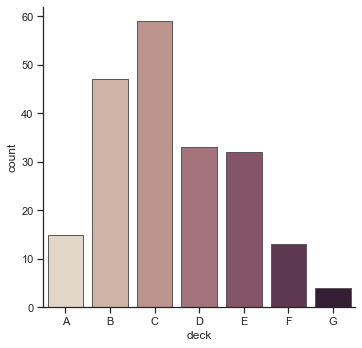

In [55]:
sns.catplot(x="deck", kind="count",
            palette="ch:.25", edgecolor=".35",  # range from [0, 1]
            data=titanic);

---

## 点状图

柱状图为每个分类以及`hue`语义的信息都赋予一个bar来进行描述，而使用点状图(point plot)可以简洁的使用单独的点来替代柱状。

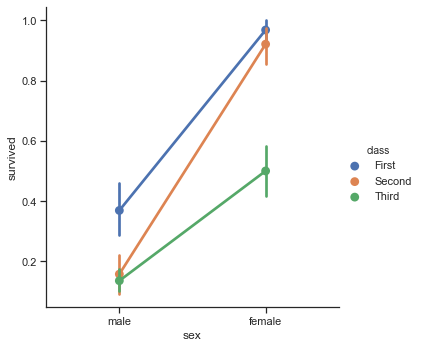

In [56]:
sns.catplot(x='sex', y='survived', hue='class',
            kind='point', data=titanic)

由图中可以清晰地看到，每个点对应的含义，以及其置信区间范围。同时对于相同的船舱等级，点状图使用一根连线将两个性别的存活率连接起来。

正因人眼对直线斜率变化的观察是很直观的，我们可以清楚地观察到两个性别之间存活率地变化关系。

---

我们可以更加个性化点状图，设置连线、点的形状、颜色等样式：

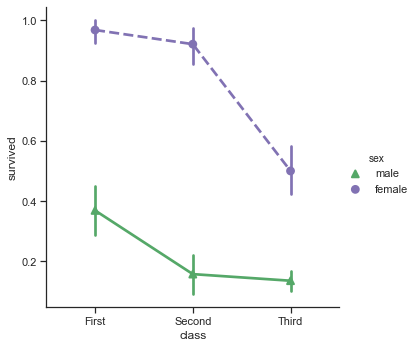

In [57]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

> `palette`参数可以设置渐变色，如果希望设置纯色，可以使用`color`参数。

---

## 使用facets观察变量间的关系

正如第一节中使用facets对数值型数据绘制了多个图，我们也可以类别型图进行类似可视化：

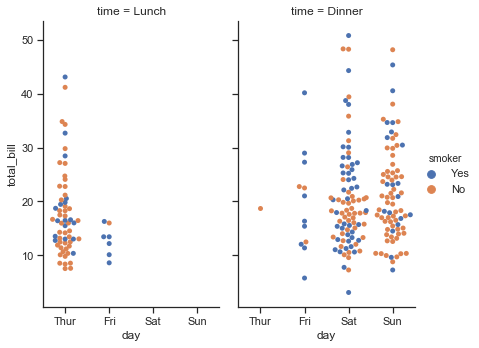

In [58]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,  # 控制facets的两个参数
            kind="swarm", data=tips);